In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from shogun import *

In [2]:
f = open('pim.txt')
pim = f.readline()
pim = pim.split('\t')
pim = np.array(list(map(lambda x: float(x), pim)))
f.close()

In [3]:
f = open('nf.txt')
nf = f.readline()
nf = nf.split('\t')
nf = np.array(list(map(lambda x: float(x), nf)))
f.close()

In [4]:
f = open('u1.txt')
u1 = f.readline()
u1 = u1.split('\t')
u1 = np.array(list(map(lambda x: float(x), u1)))
f.close()

In [5]:
rx1 = pim + nf + u1

In [6]:
f = open('u2.txt')
u2 = f.readline()
u2 = u2.split('\t')
u2 = np.array(list(map(lambda x: float(x), u2)))
f.close()

In [7]:
u2 = u2 * 2

In [8]:
rx2 = pim + nf + u2

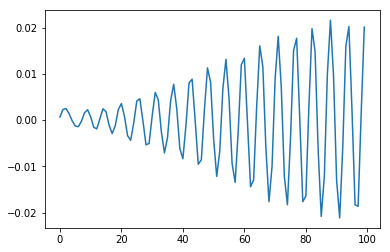

In [9]:
plt.plot(pim[:100])

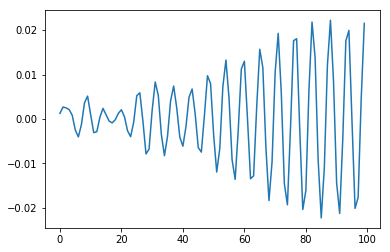

In [33]:
pimnf = pim + nf
plt.plot(pimnf[:100])

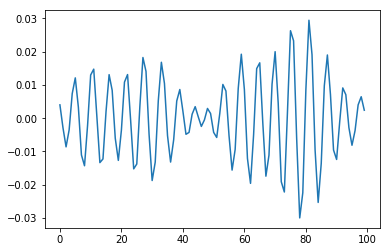

In [34]:
plt.plot((u1 + u2 * 2)[:100])

In [35]:
rx1 = rx1.reshape((250000,1))
rx2 = rx2.reshape((250000,1))
rx = np.hstack((rx1,rx2))

In [36]:
mixed_signals = RealFeatures((rx.T).astype(np.float64))

In [37]:
jade = Jade()
start = time.time()
signals = jade.apply(mixed_signals)
end = time.time() - start
S = signals.get_feature_matrix()

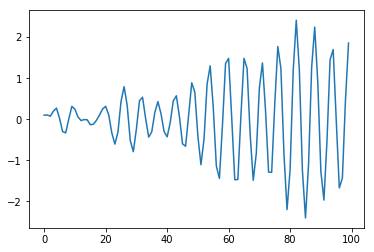

In [38]:
plt.plot(S[0,:100])

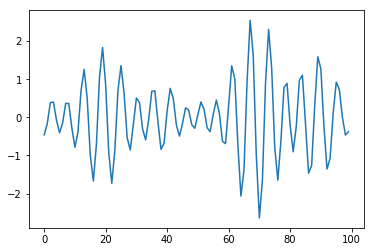

In [39]:
plt.plot(S[1,:100])

In [46]:
def sae(s1, s2):
    return np.arccos((s1 @ s2) / (np.linalg.norm(s1) * np.linalg.norm(s2))) ** 2

In [48]:
sae(S[0,:], pimnf)

0.06114855079078552

In [58]:
fft_values = np.fft.fft(S[0,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 7* mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [59]:
sae(filtered_samples, pim)

0.03365522743129152

In [60]:
ffsep = FFSep()
start = time.time()
signals = ffsep.apply(mixed_signals)
end = time.time() - start
S0 = signals.get_feature_matrix()

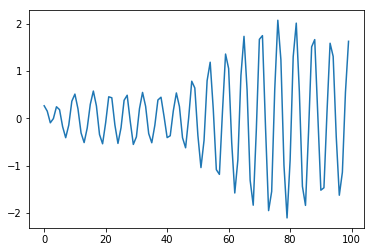

In [61]:
plt.plot(S0[0,:100])

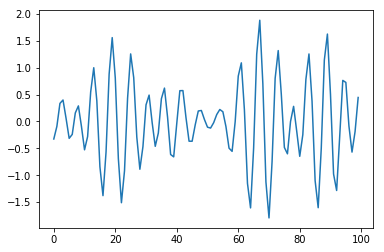

In [62]:
plt.plot(S0[1,:100])

In [63]:
sae(S0[0,:], pimnf)

0.2822213133809677

In [64]:
fft_values = np.fft.fft(S0[0,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [65]:
sae(filtered_samples, pim)

0.27626132641962764

In [66]:
sobi = SOBI()
start = time.time()
signals = sobi.apply(mixed_signals)
end = time.time() - start
S1 = signals.get_feature_matrix()

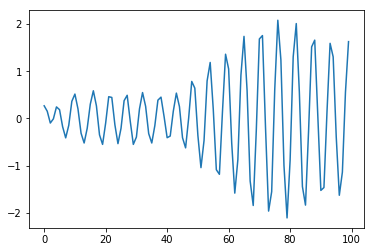

In [67]:
plt.plot(S1[0,:100])

In [68]:
sae(S1[0,:], pimnf)

0.2884569711572615

In [71]:
fft_values = np.fft.fft(S1[0,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [72]:
sae(filtered_samples, pim)

0.28256330830444143

In [73]:
jedisep = JediSep()
start = time.time()
signals = jedisep.apply(mixed_signals)
end = time.time() - start
S2 = signals.get_feature_matrix()

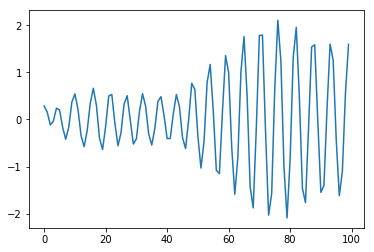

In [74]:
plt.plot(S2[0,:100])

In [75]:
sae(S2[0,:], pimnf)

0.3461771957210588

In [76]:
fft_values = np.fft.fft(S2[0,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [77]:
sae(filtered_samples, pim)

0.3403955618866642

In [78]:
uwedge = UWedgeSep()
start = time.time()
signals = uwedge.apply(mixed_signals)
end = time.time() - start
S3 = signals.get_feature_matrix()

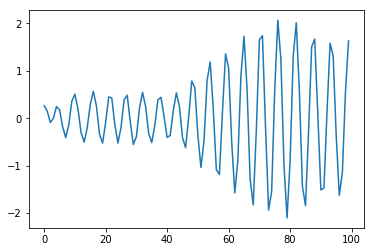

In [79]:
plt.plot(S3[0,:100])

In [80]:
sae(S3[0,:], pimnf)

0.2756280815814766

In [88]:
fft_values = np.fft.fft(S3[0,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 11 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold,0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [89]:
sae(filtered_samples, pim)

0.26993737256546513

In [90]:
fastica = FastICA()
start = time.time()
signals = fastica.apply(mixed_signals)
end = time.time() - start
S4 = signals.get_feature_matrix()

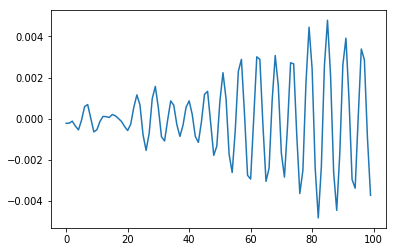

In [97]:
plt.plot(S4[0,:100])

In [100]:
sae(S4[0,:], -pimnf)

0.06254853575218439

In [101]:
fft_values = np.fft.fft(S4[0,:])
mean_value = np.mean(np.abs(fft_values))
threshold = 7 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [103]:
sae(filtered_samples, -pim)

0.035492613840848584